# Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

In [2]:
data = pd.read_csv('New_data.csv') # reading the train data
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,cust_locn,merchant_locn,trans_hour,trans_month,trans_day_of_week,Weekday,Weekend,trans_year,unix_time_prev_trans,timedelta_last_trans
0,3818,2019-01-03 07:27:51,2554069316764,fdce5nle6s4bzl,shopping_pos,7.04,spencer,williams,m,1145 tony drive suite 080,...,9zvrb2tu4,cbj0xnegd,7,1,3,1,0,2019,1.325489e+09,1440.0
1,6838,2019-01-05 12:44:55,2554069316764,n0r4bzljjwi2no,personal_care,56.57,spencer,williams,m,1145 tony drive suite 080,...,9zvrb2tu4,9zvshxqjt,12,1,5,0,1,2019,1.325576e+09,3197.0
2,7678,2019-01-06 00:21:38,2554069316764,k9stek5hgisfmxduov3,misc_pos,8.45,spencer,williams,m,1145 tony drive suite 080,...,9zvrb2tu4,9zuyw6wfn,0,1,6,0,1,2019,1.325767e+09,696.0
3,7800,2019-01-06 01:46:54,2554069316764,x7aa3gieamumyul1mss,shopping_pos,4.60,spencer,williams,m,1145 tony drive suite 080,...,9zvrb2tu4,cbhvhpv9u,1,1,6,0,1,2019,1.325809e+09,85.0
4,8204,2019-01-06 08:03:26,2554069316764,pweabbmurgtqreuw,food_dining,62.08,spencer,williams,m,1145 tony drive suite 080,...,9zvrb2tu4,9zv5hbfyp,8,1,6,0,1,2019,1.325814e+09,376.0


In [3]:
data.shape


(1296675, 33)

In [4]:
# check for the duplicated records.
data.duplicated().sum()

0

In [5]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['trans_date_trans_time'].head(3)

0   2019-01-03 07:27:51
1   2019-01-05 12:44:55
2   2019-01-06 00:21:38
Name: trans_date_trans_time, dtype: datetime64[ns]

In [6]:

data['dob'] = pd.to_datetime(data['dob'])
data['dob'].head(3)


0   1959-01-15
1   1959-01-15
2   1959-01-15
Name: dob, dtype: datetime64[ns]

In [7]:
#selecting categorical columns , and to check their cardinality
cat_cols = data.select_dtypes(include = 'object').columns # selecting the categorical columns

for col in cat_cols:

    data[col] = data[col].str.lower().str.strip() # cleaning the categorical columns with strings methods

data[cat_cols].nunique().sort_values()

gender                 2
category              14
state                 51
first                352
last                 481
job                  494
merchant             693
city                 894
cust_locn            970
street               983
merchant_locn    1296671
trans_num        1296675
dtype: int64

In [8]:
# lets look at the summary of the creit card transactions

data.groupby(['cc_num'])['cc_num'].count().sort_values(ascending = False).describe().astype(int)

count     983
mean     1319
std       812
min         7
25%       525
50%      1054
75%      2025
max      3123
Name: cc_num, dtype: int32

In [9]:
all_trans = data.copy() # create a copy dataset fof the base dataset

all_trans['class'] = all_trans['is_fraud'].map({1:'Fraud',0:'Non_Fraud'}) # mapping the classes 0 & 1 to genuine and fraud

normal = all_trans[data['is_fraud'] == 0] # create the normal transaction dataset

fraud = all_trans[data['is_fraud'] == 1] # create a fruad transaction dataset

In [10]:
del all_trans,normal,fraud # delete dataframes created for ploting purpose for free up the memory


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 33 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

# Feature Encoding

In [12]:
#one-hot encoding the category variable
category_onehot = pd.get_dummies(data.category, prefix='category', drop_first=True)
#one-hot encoding the gender variable
gender_onehot = pd.get_dummies(data.gender, prefix='gender', drop_first=True)
#one-hot encoding the day_of_week variable
day_of_week_onehot = pd.get_dummies(data.trans_day_of_week, prefix='day', drop_first=True)

# INFERENCE

After applying one-hot encoding, our dataset have additional binary columns representing the categorical variables. These binary columns can then be used as input features for your credit card fraud detection model.

In [13]:
df1 = pd.concat([data, category_onehot,gender_onehot,day_of_week_onehot], axis=1)

df1.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,category_shopping_net,category_shopping_pos,category_travel,gender_m,day_1,day_2,day_3,day_4,day_5,day_6
0,3818,2019-01-03 07:27:51,2554069316764,fdce5nle6s4bzl,shopping_pos,7.04,spencer,williams,m,1145 tony drive suite 080,...,0,1,0,1,0,0,1,0,0,0
1,6838,2019-01-05 12:44:55,2554069316764,n0r4bzljjwi2no,personal_care,56.57,spencer,williams,m,1145 tony drive suite 080,...,0,0,0,1,0,0,0,0,1,0
2,7678,2019-01-06 00:21:38,2554069316764,k9stek5hgisfmxduov3,misc_pos,8.45,spencer,williams,m,1145 tony drive suite 080,...,0,0,0,1,0,0,0,0,0,1
3,7800,2019-01-06 01:46:54,2554069316764,x7aa3gieamumyul1mss,shopping_pos,4.60,spencer,williams,m,1145 tony drive suite 080,...,0,1,0,1,0,0,0,0,0,1
4,8204,2019-01-06 08:03:26,2554069316764,pweabbmurgtqreuw,food_dining,62.08,spencer,williams,m,1145 tony drive suite 080,...,0,0,0,1,0,0,0,0,0,1


# Converting hours to Day and Night

In [14]:
# Create a new column for the day or night category
df1['day_or_night'] = data['trans_hour'].apply(lambda x: 0 if 6 <= x <= 18 else 1)

In [15]:
df1['day_or_night'].value_counts()

0    711620
1    585055
Name: day_or_night, dtype: int64

# Inference

 Fraudulent activities often exhibit different patterns during the day and at night. For example, criminals may be more active during the nighttime when there is less monitoring or when people are less likely to notice suspicious transactions. By distinguishing between day and night transactions, we uncovered different fraud patterns and improve the accuracy of fraud detection model.

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 54 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   Unnamed: 0               1296675 non-null  int64         
 1   trans_date_trans_time    1296675 non-null  datetime64[ns]
 2   cc_num                   1296675 non-null  int64         
 3   merchant                 1296675 non-null  object        
 4   category                 1296675 non-null  object        
 5   amt                      1296675 non-null  float64       
 6   first                    1296675 non-null  object        
 7   last                     1296675 non-null  object        
 8   gender                   1296675 non-null  object        
 9   street                   1296675 non-null  object        
 10  city                     1296675 non-null  object        
 11  state                    1296675 non-null  object        
 12  

In [17]:
variables = ['state']

# Mean Encoding

In [18]:
from feature_engine.encoding import MeanEncoder


In [19]:
mean_encod = MeanEncoder(variables = variables)


In [21]:
dfnew['state'].head(10)

0    0.006527
1    0.006527
2    0.006527
3    0.006527
4    0.006527
5    0.006527
6    0.006527
7    0.006527
8    0.006527
9    0.006527
Name: state, dtype: float64

# Inference

Mean encoding is  used to encode categorical variables by replacing each category with the mean value of the target variable for that category.It captures the relationship between the categorical variable and the target variable and provides a way to leverage the information from the target variable to enhance the predictive power of the categorical variable.

In [22]:
data['state'].nunique()

51

In [23]:
dfnew['state'].nunique()

51

In [24]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 54 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   Unnamed: 0               1296675 non-null  int64         
 1   trans_date_trans_time    1296675 non-null  datetime64[ns]
 2   cc_num                   1296675 non-null  int64         
 3   merchant                 1296675 non-null  object        
 4   category                 1296675 non-null  object        
 5   amt                      1296675 non-null  float64       
 6   first                    1296675 non-null  object        
 7   last                     1296675 non-null  object        
 8   gender                   1296675 non-null  object        
 9   street                   1296675 non-null  object        
 10  city                     1296675 non-null  object        
 11  state                    1296675 non-null  float64       
 12  

# Recency Frequency Measure

In [28]:
def customer_spending(customer_transactions, window_days=[1, 7, 30]):
    # Sort transactions chronologically
    customer_transactions = customer_transactions.sort_values('trans_date_trans_time')
   
    # Set transaction date and time as the index
    customer_transactions.index = customer_transactions['trans_date_trans_time']
   
    # For each window size
    for window_size in window_days:
        # Compute the sum of transaction amounts and number of transactions for the given window size
        sum_amount_tx_window = customer_transactions['amt'].rolling(f'{window_size}d').sum()
        nb_tx_window = customer_transactions['amt'].rolling(f'{window_size}d').count()
       
        # Compute the average transaction amount for the given window size
        avg_amount_tx_window = sum_amount_tx_window / nb_tx_window
       
        # Save feature values
        customer_transactions[f'Frequency_{window_size}DAY_WINDOW'] = nb_tx_window
        customer_transactions[f'Monetary_{window_size}DAY_WINDOW'] = avg_amount_tx_window
   
    # Reindex according to transaction number
    customer_transactions.index = customer_transactions['trans_num']
   
    # Return the dataframe with the new features
    return customer_transactions

dfnews = dfnew.groupby('cc_num').apply(lambda x: customer_spending(x, window_days=[1, 7, 30]))
dfnews = dfnews.sort_values('trans_date_trans_time').reset_index(drop=True)

In [29]:
dfnews

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,day_4,day_5,day_6,day_or_night,Frequency_1DAY_WINDOW,Monetary_1DAY_WINDOW,Frequency_7DAY_WINDOW,Monetary_7DAY_WINDOW,Frequency_30DAY_WINDOW,Monetary_30DAY_WINDOW
0,0,2019-01-01 00:00:18,7264641988814192,pmh2faypus6322tajukyq,misc_net,4.97,jennifer,banks,f,561 perry cove,...,0,0,0,1,1.0,4.9700,1.0,4.970000,1.0,4.970000
1,1,2019-01-01 00:00:44,3972811764589960,gcz35vqyfwizii2mvilq2t3ahu,grocery_pos,107.23,stephanie,gill,f,43039 riley greens suite 393,...,0,0,0,1,1.0,107.2300,1.0,107.230000,1.0,107.230000
2,2,2019-01-01 00:00:51,7880460321254421,fxbp4q0tlfwrlg8bpxg,entertainment,220.11,edward,sanchez,m,594 white dale suite 530,...,0,0,0,1,1.0,220.1100,1.0,220.110000,1.0,220.110000
3,3,2019-01-01 00:01:16,6696832143137150,fxqniknsn2jh9hf8vyjdbfbn1tkbc,gas_transport,45.00,jeremy,white,m,9443 cynthia court apt. 038,...,0,0,0,1,1.0,45.0000,1.0,45.000000,1.0,45.000000
4,4,2019-01-01 00:03:06,923148798306203,s1xjmqwxexq1ofwyks,misc_pos,41.96,tyler,garcia,m,408 bradley rest,...,0,0,0,1,1.0,41.9600,1.0,41.960000,1.0,41.960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,6952213599172164,pmndbb2jchwny3y,entertainment,15.56,erik,patterson,m,162 jessica row apt. 072,...,0,0,1,0,4.0,41.5600,22.0,64.662273,87.0,62.249655
1296671,1296671,2020-06-21 12:12:19,2919653030472571,2fmiyiu0ovu6wi2p5jmzv,food_dining,51.70,jeffrey,white,m,8617 holmes terrace suite 651,...,0,0,1,0,2.0,93.0400,7.0,84.772857,31.0,81.580000
1296672,1296672,2020-06-21 12:12:32,821914725617590,kpsp1tzahievu2y7mt,food_dining,105.93,christopher,castaneda,m,1632 cohen drive suite 639,...,0,0,1,0,4.0,34.4725,37.0,54.094865,140.0,56.053286
1296673,1296673,2020-06-21 12:13:36,2276077112824788,ms6eykpe9gd33rinoifn3y3all5njf,food_dining,74.90,joseph,murray,m,42933 ryan underpass,...,0,0,1,0,1.0,74.9000,25.0,92.039600,134.0,94.447313


# Inference

RFM is used to analyse customer segmentation and customer relationship management (CRM). The three key dimensions are used to analyze and segment customers based on their transactional behavior. Each dimension provides insights into different aspects of customer engagement and can be used to identify valuable customer segments for targeted marketing strategies.

# Risk and Credit Score

In [30]:
def get_count_risk_rolling_window(terminal_transactions, delay_period=7, windows_size_in_days=[1,7,30], feature="merchant"):
    
    terminal_transactions=terminal_transactions.sort_values('trans_date_trans_time')
    
   # terminal_transactions.index=terminal_transactions.trans_date_trans_time
    
    NB_FRAUD_DELAY=terminal_transactions['is_fraud'].rolling(delay_period).sum()
    NB_TX_DELAY=terminal_transactions['is_fraud'].rolling(delay_period).count()
    
    for window_size in windows_size_in_days:
    
        NB_FRAUD_DELAY_WINDOW=terminal_transactions['is_fraud'].rolling(delay_period+window_size).sum()
        NB_TX_DELAY_WINDOW=terminal_transactions['is_fraud'].rolling(delay_period+window_size).count()
    
        NB_FRAUD_WINDOW=NB_FRAUD_DELAY_WINDOW-NB_FRAUD_DELAY
        NB_TX_WINDOW=NB_TX_DELAY_WINDOW-NB_TX_DELAY
    
        RISK_WINDOW=NB_FRAUD_WINDOW/NB_TX_WINDOW
        
        terminal_transactions[feature+'_NB_TX_'+str(window_size)+'DAY_WINDOW']=list(NB_TX_WINDOW)
        terminal_transactions[feature+'_RISK_'+str(window_size)+'DAY_WINDOW']=list(RISK_WINDOW)
        
   # terminal_transactions.index=terminal_transactions.TRANSACTION_ID
    
    # Replace NA values with 0 (all undefined risk scores where NB_TX_WINDOW is 0) 
    terminal_transactions.fillna(0,inplace=True)
    
    return terminal_transactions

In [31]:
%time dfnews=dfnews.groupby('merchant').apply(lambda x: get_count_risk_rolling_window(x, delay_period=7, windows_size_in_days=[1,7,30], feature="merchant"))
dfnews=dfnews.sort_values('trans_date_trans_time').reset_index(drop=True)

CPU times: total: 13.5 s
Wall time: 25.7 s


In [32]:
def get_count_risk_rolling_window(terminal_transactions, delay_period=7, windows_size_in_days=[1,7,30], feature="cateogry"):
    
    terminal_transactions=terminal_transactions.sort_values('trans_date_trans_time')
    
   # terminal_transactions.index=terminal_transactions.trans_date_trans_time
    
    NB_FRAUD_DELAY=terminal_transactions['is_fraud'].rolling(delay_period).sum()
    NB_TX_DELAY=terminal_transactions['is_fraud'].rolling(delay_period).count()
    
    for window_size in windows_size_in_days:
    
        NB_FRAUD_DELAY_WINDOW=terminal_transactions['is_fraud'].rolling(delay_period+window_size).sum()
        NB_TX_DELAY_WINDOW=terminal_transactions['is_fraud'].rolling(delay_period+window_size).count()
    
        NB_FRAUD_WINDOW=NB_FRAUD_DELAY_WINDOW-NB_FRAUD_DELAY
        NB_TX_WINDOW=NB_TX_DELAY_WINDOW-NB_TX_DELAY
    
        RISK_WINDOW=NB_FRAUD_WINDOW/NB_TX_WINDOW
        
        terminal_transactions[feature+'_NB_TX_'+str(window_size)+'DAY_WINDOW']=list(NB_TX_WINDOW)
        terminal_transactions[feature+'_RISK_'+str(window_size)+'DAY_WINDOW']=list(RISK_WINDOW)
        
   # terminal_transactions.index=terminal_transactions.TRANSACTION_ID
    
    # Replace NA values with 0 (all undefined risk scores where NB_TX_WINDOW is 0) 
    terminal_transactions.fillna(0,inplace=True)
    
    return terminal_transactions

In [33]:
%time dfnews=dfnews.groupby('category').apply(lambda x: get_count_risk_rolling_window(x, delay_period=7, windows_size_in_days=[1,7,30], feature="category"))
dfnews=dfnews.sort_values('trans_date_trans_time').reset_index(drop=True)

CPU times: total: 8.8 s
Wall time: 14.9 s


# Inference

They are used in analysing historical data of transactions associated with specific merchants and can provide insights into their risk profile. Factors such as the frequency of fraudulent transactions, chargeback rates, and customer complaints can help determine the level of risk associated with a particular merchant.

Analyzing transaction patterns and historical data for specific transaction categories can help identify typical spending behavior and establish credit scoring models. For example, certain transaction categories, like luxury goods or travel, may indicate higher creditworthiness compared to others.

In [34]:
dfnews

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,merchant_NB_TX_7DAY_WINDOW,merchant_RISK_7DAY_WINDOW,merchant_NB_TX_30DAY_WINDOW,merchant_RISK_30DAY_WINDOW,category_NB_TX_1DAY_WINDOW,category_RISK_1DAY_WINDOW,category_NB_TX_7DAY_WINDOW,category_RISK_7DAY_WINDOW,category_NB_TX_30DAY_WINDOW,category_RISK_30DAY_WINDOW
0,0,2019-01-01 00:00:18,7264641988814192,pmh2faypus6322tajukyq,misc_net,4.97,jennifer,banks,f,561 perry cove,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-01-01 00:00:44,3972811764589960,gcz35vqyfwizii2mvilq2t3ahu,grocery_pos,107.23,stephanie,gill,f,43039 riley greens suite 393,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2019-01-01 00:00:51,7880460321254421,fxbp4q0tlfwrlg8bpxg,entertainment,220.11,edward,sanchez,m,594 white dale suite 530,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2019-01-01 00:01:16,6696832143137150,fxqniknsn2jh9hf8vyjdbfbn1tkbc,gas_transport,45.00,jeremy,white,m,9443 cynthia court apt. 038,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2019-01-01 00:03:06,923148798306203,s1xjmqwxexq1ofwyks,misc_pos,41.96,tyler,garcia,m,408 bradley rest,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,6952213599172164,pmndbb2jchwny3y,entertainment,15.56,erik,patterson,m,162 jessica row apt. 072,...,7.0,0.0,30.0,0.033333,1.0,0.0,7.0,0.0,30.0,0.0
1296671,1296671,2020-06-21 12:12:19,2919653030472571,2fmiyiu0ovu6wi2p5jmzv,food_dining,51.70,jeffrey,white,m,8617 holmes terrace suite 651,...,7.0,0.0,30.0,0.000000,1.0,0.0,7.0,0.0,30.0,0.0
1296672,1296672,2020-06-21 12:12:32,821914725617590,kpsp1tzahievu2y7mt,food_dining,105.93,christopher,castaneda,m,1632 cohen drive suite 639,...,7.0,0.0,30.0,0.000000,1.0,0.0,7.0,0.0,30.0,0.0
1296673,1296673,2020-06-21 12:13:36,2276077112824788,ms6eykpe9gd33rinoifn3y3all5njf,food_dining,74.90,joseph,murray,m,42933 ryan underpass,...,7.0,0.0,30.0,0.000000,1.0,0.0,7.0,0.0,30.0,0.0


In [35]:
dfnews.describe()

,Unnamed: 0,cc_num,amt,state,zip,lat,long,city_pop,unix_time,merch_lat,...,merchant_NB_TX_7DAY_WINDOW,merchant_RISK_7DAY_WINDOW,merchant_NB_TX_30DAY_WINDOW,merchant_RISK_30DAY_WINDOW,category_NB_TX_1DAY_WINDOW,category_RISK_1DAY_WINDOW,category_NB_TX_7DAY_WINDOW,category_RISK_7DAY_WINDOW,category_NB_TX_30DAY_WINDOW,category_RISK_30DAY_WINDOW
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,...,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.964396e+15,7.035104e+01,5.788652e-03,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,...,6.962589e+00,5.736210e-03,2.965528e+01,5.643486e-03,9.999244e-01,5.788652e-03,6.999244e+00,5.788321e-03,2.999304e+01,5.786210e-03
std,3.743180e+05,2.854713e+15,1.603160e+02,2.880427e-03,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,...,4.801554e-01,2.931543e-02,2.796487e+00,1.496020e-02,8.693231e-03,7.586269e-02,6.844898e-02,3.329306e-02,4.004232e-01,1.952304e-02
min,0.000000e+00,2.554069e+12,1.000000e+00,1.983769e-03,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.241685e+05,2.569201e+15,9.650000e+00,5.148658e-03,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,...,7.000000e+00,0.000000e+00,3.000000e+01,0.000000e+00,1.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,3.000000e+01,0.000000e+00
50%,6.483370e+05,4.989956e+15,4.752000e+01,5.692992e-03,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,...,7.000000e+00,0.000000e+00,3.000000e+01,0.000000e+00,1.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,3.000000e+01,0.000000e+00
75%,9.725055e+05,7.376226e+15,8.314000e+01,6.585269e-03,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,...,7.000000e+00,0.000000e+00,3.000000e+01,0.000000e+00,1.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,3.000000e+01,0.000000e+00
max,1.296674e+06,9.995945e+15,2.894890e+04,1.000000e+00,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,...,7.000000e+00,5.714286e-01,3.000000e+01,1.666667e-01,1.000000e+00,1.000000e+00,7.000000e+00,8.571429e-01,3.000000e+01,4.333333e-01


In [36]:
dfnews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 72 columns):
 #   Column                       Non-Null Count    Dtype         
---  ------                       --------------    -----         
 0   Unnamed: 0                   1296675 non-null  int64         
 1   trans_date_trans_time        1296675 non-null  datetime64[ns]
 2   cc_num                       1296675 non-null  int64         
 3   merchant                     1296675 non-null  object        
 4   category                     1296675 non-null  object        
 5   amt                          1296675 non-null  float64       
 6   first                        1296675 non-null  object        
 7   last                         1296675 non-null  object        
 8   gender                       1296675 non-null  object        
 9   street                       1296675 non-null  object        
 10  city                         1296675 non-null  object        
 11  state      

In [37]:
#dropping variables
dfnews.drop(['first', 'last', 'dob','cc_num','trans_date_trans_time','gender','street','city',
             'zip','lat','long','trans_num','unix_time','merch_lat','merch_long'] , axis=1, inplace=True)
dfnews.head()

,Unnamed: 0,merchant,category,amt,state,city_pop,job,is_fraud,cust_locn,merchant_locn,...,merchant_NB_TX_7DAY_WINDOW,merchant_RISK_7DAY_WINDOW,merchant_NB_TX_30DAY_WINDOW,merchant_RISK_30DAY_WINDOW,category_NB_TX_1DAY_WINDOW,category_RISK_1DAY_WINDOW,category_NB_TX_7DAY_WINDOW,category_RISK_7DAY_WINDOW,category_NB_TX_30DAY_WINDOW,category_RISK_30DAY_WINDOW
0,0,pmh2faypus6322tajukyq,misc_net,4.97,0.004923,3495,"psychologist, counselling",0,dnqm0xzyj,dnmsugwhz,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,gcz35vqyfwizii2mvilq2t3ahu,grocery_pos,107.23,0.005073,149,special educational needs teacher,0,c2eyn5c8p,c2ezwt5hp,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,fxbp4q0tlfwrlg8bpxg,entertainment,220.11,0.001984,4154,nature conservation officer,0,9x2pvqv2c,9x8jrz7e5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,fxqniknsn2jh9hf8vyjdbfbn1tkbc,gas_transport,45.00,0.002722,1939,patent attorney,0,c80r0b10z,c2rgwd7db,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,s1xjmqwxexq1ofwyks,misc_pos,41.96,0.006769,99,dance movement psychotherapist,0,dnz6xf2bu,dqbh48td4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
dfnews.drop(['merchant','job'],axis=1,inplace=True)

In [39]:
dfnews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 55 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Unnamed: 0                   1296675 non-null  int64  
 1   category                     1296675 non-null  object 
 2   amt                          1296675 non-null  float64
 3   state                        1296675 non-null  float64
 4   city_pop                     1296675 non-null  int64  
 5   is_fraud                     1296675 non-null  int64  
 6   cust_locn                    1296675 non-null  object 
 7   merchant_locn                1296675 non-null  object 
 8   trans_hour                   1296675 non-null  int64  
 9   trans_month                  1296675 non-null  int64  
 10  trans_day_of_week            1296675 non-null  int64  
 11  Weekday                      1296675 non-null  int64  
 12  Weekend                      1296675 non-n

In [40]:
dfnews.drop(['Unnamed: 0','category','trans_hour'],axis=1,inplace=True)

# Calculate distance between Customer and Merchant

In [41]:
Cde and longitude
    import math
    lat1, lon1 =  geohash2.decode(geohash1)
    lat2, lon2 =  geohash2.decode(geohash3)

    # Calculate distance using Haversine formula
    radius = 6371  # Earth's radius in kilometers
    lat1=float(lat1)
    lat2=float(lat2)
    lon1=float(lon1)
    lon2=float(lon2)
    
    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)

    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))

    distance = radius * c
    return distance
dfnews['distance']=dfnews.apply(lambda row:calculate_distance(row['cust_locn'], row['merchant_locn']),axis=1)
dfnews['distance']

0           78.596148
1           30.206798
2          108.205513
3           95.670805
4           77.553464
              ...    
1296670    119.747251
1296671     75.100908
1296672     99.048375
1296673     84.633142
1296674     83.855246
Name: distance, Length: 1296675, dtype: float64

In [42]:
dfnews.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 53 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   amt                          1296675 non-null  float64
 1   state                        1296675 non-null  float64
 2   city_pop                     1296675 non-null  int64  
 3   is_fraud                     1296675 non-null  int64  
 4   cust_locn                    1296675 non-null  object 
 5   merchant_locn                1296675 non-null  object 
 6   trans_month                  1296675 non-null  int64  
 7   trans_day_of_week            1296675 non-null  int64  
 8   Weekday                      1296675 non-null  int64  
 9   Weekend                      1296675 non-null  int64  
 10  trans_year                   1296675 non-null  int64  
 11  unix_time_prev_trans         1296675 non-null  float64
 12  timedelta_last_trans         1296675 non-n

In [43]:
datas['merchant'].nunique()

693

<AxesSubplot: >

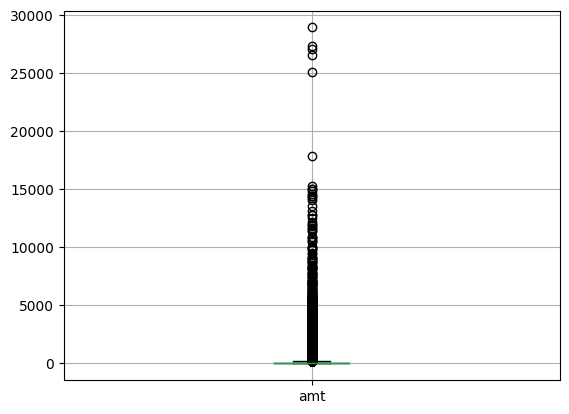

In [44]:
dfnews.boxplot(column=['amt'])


In [45]:

import pandas as pd

# Assuming 'df' is your DataFrame and 'column_name' is the name of the column you want to move

# Get the column you want to move
column_to_move = dfnews['is_fraud']

# Remove the column from its original position
dfnews = dfnews.drop('is_fraud', axis=1)

# Add the column back to the DataFrame at the last position
dfnews['is_fraud'] = column_to_move
dfnews

,amt,state,city_pop,cust_locn,merchant_locn,trans_month,trans_day_of_week,Weekday,Weekend,trans_year,...,merchant_NB_TX_30DAY_WINDOW,merchant_RISK_30DAY_WINDOW,category_NB_TX_1DAY_WINDOW,category_RISK_1DAY_WINDOW,category_NB_TX_7DAY_WINDOW,category_RISK_7DAY_WINDOW,category_NB_TX_30DAY_WINDOW,category_RISK_30DAY_WINDOW,distance,is_fraud
0,4.97,0.004923,3495,dnqm0xzyj,dnmsugwhz,1,1,1,0,2019,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,78.596148,0
1,107.23,0.005073,149,c2eyn5c8p,c2ezwt5hp,1,1,1,0,2019,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,30.206798,0
2,220.11,0.001984,4154,9x2pvqv2c,9x8jrz7e5,1,1,1,0,2019,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,108.205513,0
3,45.00,0.002722,1939,c80r0b10z,c2rgwd7db,1,1,1,0,2019,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,95.670805,0
4,41.96,0.006769,99,dnz6xf2bu,dqbh48td4,1,1,1,0,2019,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,77.553464,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,0.005701,258,9w8n8d20r,9w89d6trb,6,6,0,1,2020,...,30.0,0.033333,1.0,0.0,7.0,0.0,30.0,0.0,119.747251,0
1296671,51.70,0.005994,100,dqbzkhqc5,dqbm76y95,6,6,0,1,2020,...,30.0,0.000000,1.0,0.0,7.0,0.0,30.0,0.0,75.100908,0
1296672,105.93,0.004998,899,9tug2h3p0,9tvpr8nrc,6,6,0,1,2020,...,30.0,0.000000,1.0,0.0,7.0,0.0,30.0,0.0,99.048375,0
1296673,74.90,0.006005,1126,9xxnds5g5,9xwe6tqpd,6,6,0,1,2020,...,30.0,0.000000,1.0,0.0,7.0,0.0,30.0,0.0,84.633142,0


In [46]:
dfnews.drop(['trans_day_of_week'],axis=1,inplace=True)

In [47]:
x = dfnews.drop("is_fraud", axis=1) #independent
y = pd.DataFrame(dfnews["is_fraud"])  # dependent

# Splitting of Dataset

In [48]:
# TRAIN TEST SPLIT

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfnews.iloc[:, :-1], dfnews.iloc[:, -1:], test_size = 0.2, random_state=5)


In [49]:
#final_df
object_columns = dfnews.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = dfnews.select_dtypes(include=['int', 'float']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['cust_locn', 'merchant_locn'], dtype='object')

Numerical type columns:
Index(['amt', 'state', 'city_pop', 'trans_month', 'Weekday', 'Weekend',
       'trans_year', 'unix_time_prev_trans', 'timedelta_last_trans',
       'day_or_night', 'Frequency_1DAY_WINDOW', 'Monetary_1DAY_WINDOW',
       'Frequency_7DAY_WINDOW', 'Monetary_7DAY_WINDOW',
       'Frequency_30DAY_WINDOW', 'Monetary_30DAY_WINDOW',
       'merchant_NB_TX_1DAY_WINDOW', 'merchant_RISK_1DAY_WINDOW',
       'merchant_NB_TX_7DAY_WINDOW', 'merchant_RISK_7DAY_WINDOW',
       'merchant_NB_TX_30DAY_WINDOW', 'merchant_RISK_30DAY_WINDOW',
       'category_NB_TX_1DAY_WINDOW', 'category_RISK_1DAY_WINDOW',
       'category_NB_TX_7DAY_WINDOW', 'category_RISK_7DAY_WINDOW',
       'category_NB_TX_30DAY_WINDOW', 'category_RISK_30DAY_WINDOW', 'distance',
       'is_fraud'],
      dtype='object')


In [50]:
dfnews.drop(['cust_locn'],axis=1,inplace=True)
dfnews.drop(['merchant_locn'],axis=1,inplace=True)

dfnews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 50 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   amt                          1296675 non-null  float64
 1   state                        1296675 non-null  float64
 2   city_pop                     1296675 non-null  int64  
 3   trans_month                  1296675 non-null  int64  
 4   Weekday                      1296675 non-null  int64  
 5   Weekend                      1296675 non-null  int64  
 6   trans_year                   1296675 non-null  int64  
 7   unix_time_prev_trans         1296675 non-null  float64
 8   timedelta_last_trans         1296675 non-null  float64
 9   category_food_dining         1296675 non-null  uint8  
 10  category_gas_transport       1296675 non-null  uint8  
 11  category_grocery_net         1296675 non-null  uint8  
 12  category_grocery_pos         1296675 non-n

In [51]:
display(dfnews.head())
print("All the features in this dataset have continuous values")

,amt,state,city_pop,trans_month,Weekday,Weekend,trans_year,unix_time_prev_trans,timedelta_last_trans,category_food_dining,...,merchant_NB_TX_30DAY_WINDOW,merchant_RISK_30DAY_WINDOW,category_NB_TX_1DAY_WINDOW,category_RISK_1DAY_WINDOW,category_NB_TX_7DAY_WINDOW,category_RISK_7DAY_WINDOW,category_NB_TX_30DAY_WINDOW,category_RISK_30DAY_WINDOW,distance,is_fraud
0,4.97,0.004923,3495,1,1,0,2019,1.325290e+09,1440.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.596148,0
1,107.23,0.005073,149,1,1,0,2019,1.325290e+09,1440.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.206798,0
2,220.11,0.001984,4154,1,1,0,2019,1.325290e+09,1440.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.205513,0
3,45.00,0.002722,1939,1,1,0,2019,1.325290e+09,1440.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,95.670805,0
4,41.96,0.006769,99,1,1,0,2019,1.325290e+09,1440.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.553464,0


All the features in this dataset have continuous values


In [52]:
print("Total no. of columns: ", len(dfnews.columns))
print(dfnews.columns)

Total no. of columns:  50
Index(['amt', 'state', 'city_pop', 'trans_month', 'Weekday', 'Weekend',
       'trans_year', 'unix_time_prev_trans', 'timedelta_last_trans',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel',
       'gender_m', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_or_night', 'Frequency_1DAY_WINDOW', 'Monetary_1DAY_WINDOW',
       'Frequency_7DAY_WINDOW', 'Monetary_7DAY_WINDOW',
       'Frequency_30DAY_WINDOW', 'Monetary_30DAY_WINDOW',
       'merchant_NB_TX_1DAY_WINDOW', 'merchant_RISK_1DAY_WINDOW',
       'merchant_NB_TX_7DAY_WINDOW', 'merchant_RISK_7DAY_WINDOW',
       'merchant_NB_TX_30DAY_WINDOW', 'merchant_RISK_30DAY_WINDOW',
       'category_NB_TX_1DAY_WINDOW', '

In [53]:
dfnews.drop(['day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6'],axis=1,inplace=True)

In [55]:
object_columns = dfnews.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = dfnews.select_dtypes(include=['int', 'float']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index([], dtype='object')

Numerical type columns:
Index(['amt', 'state', 'city_pop', 'trans_month', 'Weekday', 'Weekend',
       'trans_year', 'unix_time_prev_trans', 'timedelta_last_trans',
       'day_or_night', 'Frequency_1DAY_WINDOW', 'Monetary_1DAY_WINDOW',
       'Frequency_7DAY_WINDOW', 'Monetary_7DAY_WINDOW',
       'Frequency_30DAY_WINDOW', 'Monetary_30DAY_WINDOW',
       'merchant_NB_TX_1DAY_WINDOW', 'merchant_RISK_1DAY_WINDOW',
       'merchant_NB_TX_7DAY_WINDOW', 'merchant_RISK_7DAY_WINDOW',
       'merchant_NB_TX_30DAY_WINDOW', 'merchant_RISK_30DAY_WINDOW',
       'category_NB_TX_1DAY_WINDOW', 'category_RISK_1DAY_WINDOW',
       'category_NB_TX_7DAY_WINDOW', 'category_RISK_7DAY_WINDOW',
       'category_NB_TX_30DAY_WINDOW', 'category_RISK_30DAY_WINDOW', 'distance',
       'is_fraud'],
      dtype='object')


In [56]:
dfnews.drop('is_fraud', axis=1,inplace=True)

# Oversampling through ADASYN

In [57]:
from imblearn.over_sampling import ADASYN

X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify = y_resampled, random_state=42)

In [58]:
y_resampled.value_counts()

is_fraud
0           1031400
1           1030817
dtype: int64

In [59]:
df2 = pd.concat([X_resampled, y_resampled], axis=1)

In [60]:
df2 = df2.reset_index(drop=True)

In [61]:
df2.head()

,amt,state,city_pop,trans_month,Weekday,Weekend,trans_year,unix_time_prev_trans,timedelta_last_trans,category_food_dining,...,merchant_NB_TX_30DAY_WINDOW,merchant_RISK_30DAY_WINDOW,category_NB_TX_1DAY_WINDOW,category_RISK_1DAY_WINDOW,category_NB_TX_7DAY_WINDOW,category_RISK_7DAY_WINDOW,category_NB_TX_30DAY_WINDOW,category_RISK_30DAY_WINDOW,distance,is_fraud
0,135.04,0.006906,6284,7,0,1,2019,1.342806e+09,8.0,0,...,30.0,0.000000,1.0,0.0,7.0,0.0,30.0,0.0,7.539311,0
1,68.91,0.006647,1453,2,1,0,2019,1.329891e+09,480.0,0,...,30.0,0.000000,1.0,0.0,7.0,0.0,30.0,0.0,93.086434,0
2,47.97,0.006585,224256,5,0,1,2020,1.369392e+09,385.0,0,...,30.0,0.000000,1.0,0.0,7.0,0.0,30.0,0.0,128.012419,0
3,18.66,0.006647,1304,4,0,1,2019,1.334861e+09,1307.0,0,...,30.0,0.000000,1.0,0.0,7.0,0.0,30.0,0.0,134.944352,0
4,727.56,0.005736,737,3,1,0,2020,1.364011e+09,1085.0,0,...,30.0,0.033333,1.0,0.0,7.0,0.0,30.0,0.0,81.109957,1


# INFERENCE

ADASYN is used to generate synthetic examples of fraudulent transactions to balance the dataset and improve the performance of fraud detection models. It address the class imbalance issue by oversampling the minority class, providing the model with more representative examples to learn from. By creating synthetic instances, ADASYN helps the model better capture the complexities and patterns present in fraudulent transactions, potentially leading to improved fraud detection performance.

# Feature Selection Techniques

Using Xgboost as a classifier to check the average of precision and recall before feature selection.

In [63]:
import pandas as pd
import numpy as np
import random
import sklearn
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from deap import base, creator, tools, algorithms


import xgboost as xgb
from sklearn.metrics import precision_score, recall_score

# Create the XGBoost classifier
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    eta=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    n_estimators=100
)

# Train the XGBoost model
model.fit(X_resampled, y_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate precision and recall
precision = precision_score(y_test['is_fraud'].tolist(), y_pred)
recall = recall_score(y_test['is_fraud'].tolist(), y_pred)

# Calculate the average of precision and recall
avg = (precision + recall) / 2
avg


0.9826597874505407

# INFERENCE

Fraud detection datasets often contain noise or outliers. XGBoost's robustness to noisy data makes it capable of handling such scenarios. It can effectively identify and disregard noisy patterns, reducing the chances of false positives or false negatives.

### Saving the record

In [64]:
import joblib 
joblib.dump(model,'XGB_model_SMOTE.pkl')

['XGB_model_SMOTE.pkl']

# GENETIC ALGORITHM FOR FEATURE SELECTION

This code initializes a Genetic Algorithm (GA) for feature selection. It defines a fitness function for maximizing accuracy, creates individuals as binary strings representing variable presence, and registers necessary tools in the toolbox for population initialization.

In [65]:
# Create a fitness function with weight 1. 
# If it's a maximization function the weight should be positive else,for minimization, it should be negative 
# Here, we want to maximize accuracy
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
# Create blank individual as list with the fitness function defined above.
# Individual is synonymous with chromosome
creator.create("Individual", list, fitness=creator.FitnessMax)
# Declare the size of the chromosome. Here the size will be no. of variables   
# ####ind_size = X_train.shape[1]
ind_size = X_resampled.shape[1]
# Declare the toolbox. Toolbox is a container which contains all the operators declared
# To include any operator in the toolbox, it has to registered
toolbox = base.Toolbox()
# Register a random number generator function to randomly generate 1 or 0.
# This will signify whether a variable is present or not in a particular individual. 1: Present; 0: Absent
# 1/0 values, here, are alleles
toolbox.register("attrib_bin", random.randint, 0, 1)
# Insert values in individuals which will have value from random number generator defined above
# size of each individual will be no. of variables
# Register the individuals in the toolbox
# initRepeat argument is used to initialize the individual
toolbox.register(
    "individual", tools.initRepeat, creator.Individual, toolbox.attrib_bin, n=ind_size
)
# Define a population with the individuals created above
# Register the population in toolbox
# initRepeat argument is used to initialize the population
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

This code generates an individual for the genetic algorithm with a binary string representing variable presence. The length of the chromosome is determined by the number of variables, and it prints the size and the generated individual.

In [66]:
ind1 = toolbox.individual()
print("Total no. of variables/length of each chromosome = ", ind_size)
print(ind1)

Total no. of variables/length of each chromosome =  43
[1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1]


The evaluate function calculates the fitness of an individual in the genetic algorithm. It sums the binary chromosome to determine the number of selected features. If no features are selected (sum = 0), it returns a fitness of 0. Otherwise, it selects the corresponding features from the dataset, trains a model, predicts the test set, and calculates the average precision and recall. The fitness is the average precision and recall combined.

In [67]:
def evaluate(individual):
    sum_features = np.sum(individual)
    if sum_features == 0:
        return 0.0
    else:
        sum_features = np.sum(individual)
        collector_train = []
        collector_test = []
        for k in range(0, len(individual)):
            if individual[k] == 1:
                collector_train.append(X_resampled.iloc[:, k])
                collector_test.append(X_test.iloc[:, k])
        X_train1 = np.transpose(np.array(collector_train))
        X_test1 = np.transpose(np.array(collector_test))
        np.nan_to_num(X_train1, copy=False)
        np.nan_to_num(y_resampled, copy=False)
        np.nan_to_num(X_test1, copy=False)
        np.nan_to_num(y_test, copy=False)

        clf = model.fit(X_train1, y_resampled)
        y_pred = clf.predict(X_test1)
        
        precision = precision_score(y_test['is_fraud'], y_pred)
        recall = recall_score(y_test['is_fraud'], y_pred)
        average_precision_recall = (precision + recall) / 2

        return (average_precision_recall,)

The code registers the crossover operator as two-point crossover, the mutation operator as bit-flip mutation with a probability of 0.01 per attribute. The selection operator is tournament selection with a tournament size of 3. The fitness evaluation function is registered. Statistics are defined to track the mean, maximum, and minimum fitness values during the algorithm run.

In [68]:
# Two points crossover
toolbox.register("mate", tools.cxTwoPoint)
# Bit flip mutation The indpb argument is the probability of each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=0.01)
# Select the best individual among tournsize randomly chosen individuals
toolbox.register("select", tools.selTournament, tournsize=3)
# Register the fitness function defined above in the toolbox
toolbox.register("evaluate", evaluate)
# Define the statistics to be shown during the algorithm run.
# We have selected minimum, maximum and average accuracy for each generation of run
# Decision will, however, be taken based on maximum accuracy as defined earlier
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("Mean", np.mean)
stats.register("Max", np.max)
stats.register("Min", np.min)

The code initializes a population of size 20 and creates a Hall of Fame to store the best individual. The "eaSimple" method is used to run the evolutionary algorithm with specified parameters. After the algorithm finishes, the best individual and its fitness are printed.


In [69]:
#Define initial population with its size. Here we are defining low population size (only 20) for demonstration
pop = toolbox.population(n=20)
# Below HallOfFame argument saves k best individual across all the generations
# We will use this to determine our final variable combination. 
# We are taking only the first best one. It is possible to save k number of best solution in hof
hof = tools.HallOfFame(1)
# Now, let's run the algorithm with the most simple in-built method available in DEAP (eaSimple).
# The arguments are as below:
# pop: Population defined earlier
# toolbox: toolbox containing all the operator defined
# cxpb: The probability of mating two individuals.
# mutpb: The probability of mutating an individual. We are keeping it high to show the impact
# ngen: The number of generation.
pop, log = algorithms.eaSimple(
    pop, toolbox, cxpb=0.5, mutpb=0.3, ngen=12, halloffame=hof, stats=stats)
# Get the best individual
best = hof.items[0]
#Print the best individual and it's accuracy
print("Best Individual = ", best)
print("Best Fitness = ", best.fitness.values[0])

gen	nevals	Mean    	Max     	Min     
0  	20    	0.960101	0.981238	0.880901
1  	14    	0.972756	0.981238	0.96632 
2  	10    	0.975569	0.981238	0.970216
3  	14    	0.978568	0.981543	0.973588
4  	17    	0.980244	0.981543	0.977925
5  	8     	0.981237	0.982523	0.980273
6  	9     	0.981587	0.982523	0.979808
7  	6     	0.982202	0.982523	0.981478
8  	17    	0.982457	0.982523	0.981968
9  	16    	0.982364	0.982523	0.979566
10 	17    	0.982522	0.982781	0.982292
11 	14    	0.982521	0.982781	0.981988
12 	14    	0.982625	0.982781	0.982294
Best Individual =  [1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0]
Best Fitness =  0.9827813615068921


### Selected features 

In [77]:
best_collector = []
for k in range(0, 42):
    if best[k] == 1:
        best_collector.append(X_resampled.columns[k])
print("No. of variables select = ", len(best_collector))
print(best_collector)

#X_resampled, y_resampled

No. of variables select =  25
['amt', 'city_pop', 'trans_month', 'timedelta_last_trans', 'category_food_dining', 'category_gas_transport', 'category_grocery_pos', 'category_kids_pets', 'category_misc_pos', 'category_shopping_net', 'category_shopping_pos', 'category_travel', 'day_or_night', 'Frequency_1DAY_WINDOW', 'Monetary_1DAY_WINDOW', 'Frequency_7DAY_WINDOW', 'Monetary_7DAY_WINDOW', 'Monetary_30DAY_WINDOW', 'merchant_NB_TX_1DAY_WINDOW', 'merchant_RISK_1DAY_WINDOW', 'merchant_RISK_7DAY_WINDOW', 'merchant_RISK_30DAY_WINDOW', 'category_NB_TX_1DAY_WINDOW', 'category_RISK_7DAY_WINDOW', 'category_RISK_30DAY_WINDOW']


### Average of precision recall after feature selection

In [78]:
X_train1_best = X_resampled[best_collector]
clf_best = model.fit(X_train1_best, y_resampled)
X_test1 = X_test[best_collector]
y_pred = clf_best.predict(X_test1)

precision = precision_score(y_test['is_fraud'].tolist(), y_pred)
recall = recall_score(y_test['is_fraud'].tolist(), y_pred)

avg = (precision + recall) / 2
avg


0.9827813615068921

# INFERENCE

The feature selection process aims to identify the most relevant features for a given task. In this case, the algorithm successfully selected a subset of features that resulted in a slightly improved average precision and recall of 0.9827 compared to the previous value of 0.9826. This indicates that the selected features contribute positively to the fraud detection model's performance, potentially improving its accuracy and ability to identify fraudulent transactions.

# PARTICLE SWARM OPTIMIZATION FOR FEATURE SELECTION

The given code implements a Particle Swarm Optimization (PSO) algorithm for feature selection. It starts by randomly generating a population of chromosomes (feature combinations) represented as binary strings. The algorithm evaluates the fitness of each chromosome based on precision and recall scores. It then updates the personal best and global best solutions. The algorithm iterates multiple times, adjusting the velocity of each chromosome and updating the personal and global bests. The final selected features are printed as the output.

In [79]:
import random
import numpy as np

columnsName1 = [0, 1]

random.seed()

chromosomes = []
for _ in range(10):
    chro1 = []
    for _ in range(X_resampled.shape[1]):  # Assuming X_train is a pandas DataFrame or numpy array
        item = random.choice(columnsName1)
        chro1.append(item)
    chromosomes.append(chro1)

def data(chromosomes1):
    chromosomes2 = []
    for i in range(len(chromosomes1)):
        if chromosomes1[i] != 1:
            chromosomes2.append(X_resampled.columns[i])  # Assuming X_train is a pandas DataFrame
    return chromosomes2

pb = []

def calculate_precision_recall(selected_features, X, y):
    # Replace with your precision and recall calculation based on the selected features, X, and y
    precision = 0.8
    recall = 0.9
    return (precision + recall) / 2

def check_personal_best(X, y):
    for i in range(len(chromosomes)):
        pb.append(calculate_precision_recall(data(chromosomes[i]), X, y))

def check_velocity(global_best):
    velocity = []
    for j in range(len(chromosomes)):
        velocity.append(list(0 + 1 * (np.random.random(1)[0]) * (np.array(chromosomes[j]) - np.array(chromosomes[j])) +
                            1 * (np.random.random(1)[0]) * (np.array(global_best) - np.array(chromosomes[j]))))
    return velocity

def adding_chromosomes(velocity):
    chromosomes2 = []
    for i in range(len(velocity)):
        next_chromo = []
        for j in range(len(velocity[i])):
            next_chromo.append(chromosomes[i][j] + velocity[i][j])
        chromosomes2.append(next_chromo)
    return chromosomes2

def normalize(chromosomes2):
    for l in range(len(chromosomes2)):
        for m in range(len(chromosomes2[l])):
            if chromosomes2[l][m] > 0.5:
                chromosomes2[l][m] = 1
            else:
                chromosomes2[l][m] = 0
    return chromosomes2

def check_personal_best_updated(chromosomes2, X, y):
    personal = []
    for i in range(len(chromosomes2)):
        personal.append(calculate_precision_recall(data(chromosomes2[i]), X, y))
    for j in range(len(personal)):
        if personal[j] > pb[j]:
            chromosomes[j] = chromosomes2[j]
            pb[j] = personal[j]
    return personal

# Pass X_train and y_train to check_personal_best function
check_personal_best(X_resampled, y_resampled)

max_pb = max(pb)
ind = pb.index(max_pb)
global_best = chromosomes[ind]

for _ in range(100):
    chromosomes2 = []
    personal = []
    velocity = check_velocity(global_best)
    chromosomes2 = adding_chromosomes(velocity)
    chromosomes2 = normalize(chromosomes2)
    # Pass X_train and y_train to check_personal_best_updated function
    personal = check_personal_best_updated(chromosomes2, X_resampled, y_resampled)
    max_pb = max(pb)
    ind = pb.index(max_pb)
    global_best = chromosomes[ind]

ind = pb.index(max(pb))
global_best = chromosomes[ind]
print(data(global_best))

['amt', 'city_pop', 'trans_month', 'Weekend', 'timedelta_last_trans', 'category_health_fitness', 'category_home', 'category_personal_care', 'category_shopping_pos', 'category_travel', 'Frequency_1DAY_WINDOW', 'Monetary_1DAY_WINDOW', 'Frequency_7DAY_WINDOW', 'Monetary_30DAY_WINDOW', 'merchant_NB_TX_1DAY_WINDOW', 'merchant_RISK_1DAY_WINDOW', 'merchant_NB_TX_30DAY_WINDOW', 'category_NB_TX_7DAY_WINDOW', 'category_RISK_7DAY_WINDOW', 'category_NB_TX_30DAY_WINDOW', 'distance']


# INFERENCE

The results show the selected features that maximize the average precision and recall. By optimizing the feature selection process, the algorithm aims to improve the performance of the fraud detection model.

### SELECTED FEATURES BY BOTH METHODS 

In [75]:
## PSO ##

# 'amt', 'city_pop', 'trans_month', 'Weekend', 
# 'timedelta_last_trans', 'category_health_fitness', 
# 'category_home', 'category_personal_care', 'category_shopping_pos', 
# 'category_travel', 'Frequency_1DAY_WINDOW', 'Monetary_1DAY_WINDOW', 
# 'Frequency_7DAY_WINDOW', 'Monetary_30DAY_WINDOW', 'merchant_NB_TX_1DAY_WINDOW',
# 'merchant_RISK_1DAY_WINDOW', 'merchant_NB_TX_30DAY_WINDOW', 'category_NB_TX_7DAY_WINDOW', 
# 'category_RISK_7DAY_WINDOW', 'category_NB_TX_30DAY_WINDOW', 'distance'


## GA ##


# 'amt', 'city_pop', 'trans_month', 'timedelta_last_trans',
# 'category_food_dining', 'category_gas_transport', 'category_grocery_pos', 
# 'category_kids_pets', 'category_misc_pos', 'category_shopping_net', 'category_shopping_pos', 
# 'category_travel', 'day_or_night', 'Frequency_1DAY_WINDOW', 'Monetary_1DAY_WINDOW', 
# 'Frequency_7DAY_WINDOW', 'Monetary_7DAY_WINDOW', 'Monetary_30DAY_WINDOW', 'merchant_NB_TX_1DAY_WINDOW', 
# 'merchant_RISK_1DAY_WINDOW', 'merchant_RISK_7DAY_WINDOW', 'merchant_RISK_30DAY_WINDOW', 'category_NB_TX_1DAY_WINDOW',
# 'category_RISK_7DAY_WINDOW', 'category_RISK_30DAY_WINDOW'


FEATURE SELECTION ACCORDING TO THE RESEARCH

In [85]:
df2.columns

Index(['amt', 'city_pop', 'trans_month', 'Weekday', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel', 'Frequency_1DAY_WINDOW',
       'Monetary_1DAY_WINDOW', 'Monetary_7DAY_WINDOW',
       'merchant_NB_TX_1DAY_WINDOW', 'merchant_RISK_1DAY_WINDOW',
       'merchant_RISK_7DAY_WINDOW', 'category_NB_TX_1DAY_WINDOW',
       'category_RISK_1DAY_WINDOW', 'distance', 'is_fraud'],
      dtype='object')

## Saving a new file with selected features and pre-processing 

In [87]:
df2.to_csv('Selected_Features.csv', index=False) 